In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [2]:
df=pd.read_csv('heart.csv')
print(df.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [3]:
missing=df.isnull()
num=missing.sum()
print(num)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


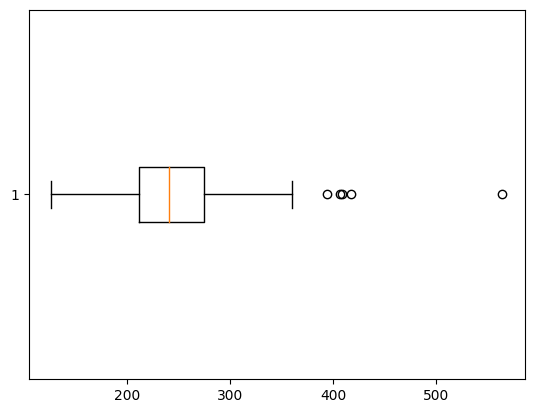

In [4]:
#there are no missing values in the data
from matplotlib.pyplot import boxplot,show
values=df.chol
plt.boxplot(values,vert=False)
plt.show()

In [5]:
import statistics as st
cpmean=st.mean(df['chol'])
print(cpmean)

246.26402640264027


In [6]:
print("The number of males suffering heart failures are:",df[df['sex']==1]['output'].value_counts())

The number of males suffering heart failures are: output
0    114
1     93
Name: count, dtype: int64


In [7]:
print("The number of diabeteic patients who suffer heart failures are:",df[df['chol']==1]['output'].value_counts())

The number of diabeteic patients who suffer heart failures are: Series([], Name: count, dtype: int64)


In [8]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
print(df['age'].max())
print(df['age'].min())

77
29


In [10]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [11]:
print(X)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [12]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [15]:
'''ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))'''

"ann=tf.keras.models.Sequential()\nann.add(tf.keras.layers.Dense(units=12,activation='relu'))\nann.add(tf.keras.layers.Dense(units=12,activation='relu'))\nann.add(tf.keras.layers.Dense(units=12,activation='relu'))\nann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))"

In [16]:
#ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [17]:
#ann.fit(X_train,y_train,batch_size=32,epochs=100)

In [39]:
'''y_pred=ann.predict(X_test)
y_pred=y_pred>0.5
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))'''

'y_pred=ann.predict(X_test)\ny_pred=y_pred>0.5\nprint(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))'

In [40]:
'''from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("This model has an accuracy of:",accuracy_score(y_test,y_pred))'''

'from sklearn.metrics import confusion_matrix,accuracy_score\ncm=confusion_matrix(y_test,y_pred)\nprint(cm)\nprint("This model has an accuracy of:",accuracy_score(y_test,y_pred))'

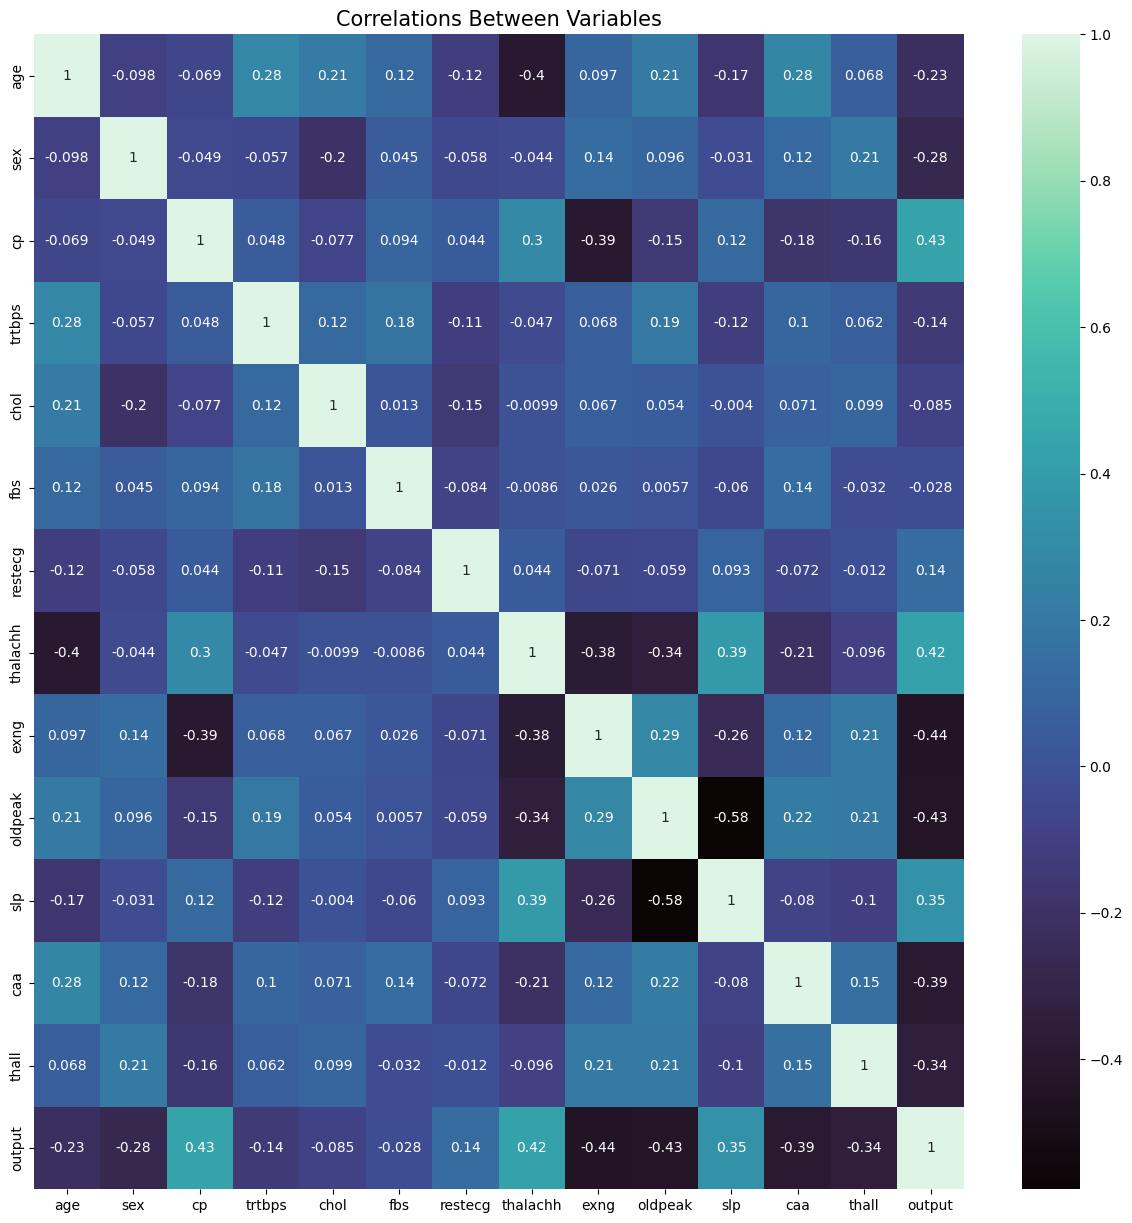

In [18]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="mako")
plt.title("Correlations Between Variables",size=15)
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("This model has an accuracy of:",accuracy_score(y_test,y_pred))

[[21  7]
 [ 0 33]]
This model has an accuracy of: 0.8852459016393442


In [43]:
'''from sklearn.ensemble import RandomForestClassifier

r_clf = RandomForestClassifier(n_estimators=100,max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(X_train, y_train)
r_pred = r_clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("This model has an accuracy of:",accuracy_score(y_test,y_pred))'''

'from sklearn.ensemble import RandomForestClassifier\n\nr_clf = RandomForestClassifier(n_estimators=100,max_features=0.5, max_depth=15, random_state=1)\nr_clf.fit(X_train, y_train)\nr_pred = r_clf.predict(X_test)\ncm=confusion_matrix(y_test,y_pred)\nprint(cm)\nprint("This model has an accuracy of:",accuracy_score(y_test,y_pred))'

In [44]:
'''from sklearn.naive_bayes import GaussianNB  
naive=GaussianNB()
naive.fit(X_train,y_train)
y_pred=naive.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("This model has an accuracy of:",accuracy_score(y_test,y_pred))'''

'from sklearn.naive_bayes import GaussianNB  \nnaive=GaussianNB()\nnaive.fit(X_train,y_train)\ny_pred=naive.predict(X_test)\ncm=confusion_matrix(y_test,y_pred)\nprint(cm)\nprint("This model has an accuracy of:",accuracy_score(y_test,y_pred))'

In [45]:
'''import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred=xgb_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("This model has an accuracy of:",accuracy_score(y_test,y_pred))'''

'import xgboost as xgb\nxgb_classifier = xgb.XGBClassifier()\nxgb_classifier.fit(X_train,y_train)\ny_pred=xgb_classifier.predict(X_test)\ncm=confusion_matrix(y_test,y_pred)\nprint(cm)\nprint("This model has an accuracy of:",accuracy_score(y_test,y_pred))'

In [46]:
'''from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=100,max_features=5 )
gbc.fit(X_train, y_train)
pred_y = gbc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("This model has an accuracy of:",accuracy_score(y_test,y_pred))'''


'from sklearn.ensemble import GradientBoostingClassifier\ngbc = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=100,max_features=5 )\ngbc.fit(X_train, y_train)\npred_y = gbc.predict(X_test)\ncm=confusion_matrix(y_test,y_pred)\nprint(cm)\nprint("This model has an accuracy of:",accuracy_score(y_test,y_pred))'

In [20]:
joblib.dump(lr,'heart_model.sav')
# import json

# # Convert the model to a JSON string
# model_json = lr.to_json()

# # Save the model to a file
# with open("heart_model.json", "w") as json_file:
#     json_file.write(model_json)

['heart_model.sav']

In [21]:
import sklearn
print(sklearn.__version__)

1.2.2
